In [2]:
'Test_Task2_With or without baby Detection using RanFor model and SVM model'

'Test_Task2_With or without baby Detection using RanFor model and SVM model'

In [4]:
import gc
gc.collect()

3127

In [6]:
%reset -f

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

# Test measurements

In [11]:
import numpy as np
import pandas as pd
file_path = 'test_Carrierseat_withoutbaby_npy_array_Lowpassfiltered_withlabel_0.npy'

# Load the NumPy array from the file
loaded_array = np.load(file_path, mmap_mode='r')

# Now 'loaded_array' contains the NumPy array data that was saved in the file
dataframe_testdata = pd.DataFrame(loaded_array,columns=['Frequency','FFT Magnitude','Phase','Infant_Presence'])
#dataframe_testdata = dataframe_testdata.iloc[:2000]
#dataframe_testdata = dataframe_testdata.sample(n=2000, random_state=42)
dataframe_testdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.00000,16732.464039,0.000000,0.0
1,488.28125,8333.605309,3.112956,0.0
2,976.56250,204.398557,-1.629384,0.0
3,1464.84375,124.749508,1.244306,0.0
4,1953.12500,218.879548,-2.558848,0.0
...,...,...,...,...
3995,-2441.40625,112.613316,-0.375541,0.0
3996,-1953.12500,218.879548,2.558848,0.0
3997,-1464.84375,124.749508,-1.244306,0.0
3998,-976.56250,204.398557,1.629384,0.0


In [14]:
num_rows_test = len(dataframe_testdata)
num_rows_test

4000

In [16]:
fft_magnitudes_test = dataframe_testdata["FFT Magnitude"].values  # Convert to NumPy array
fft_magnitudes_test

array([16732.46403877,  8333.60530898,   204.39855699, ...,
         124.74950842,   204.39855699,  8333.60530898], shape=(4000,))

In [18]:
fft_frequencies_test = dataframe_testdata["Frequency"].values  # Convert to NumPy array
fft_frequencies_test

array([    0.     ,   488.28125,   976.5625 , ..., -1464.84375,
        -976.5625 ,  -488.28125], shape=(4000,))

In [20]:
fft_phase_test = dataframe_testdata["Phase"].values  # Convert to NumPy array
fft_phase_test

array([ 0.        ,  3.11295639, -1.62938386, ..., -1.24430612,
        1.62938386, -3.11295639], shape=(4000,))

In [22]:
import numpy as np
from scipy.stats import entropy
from scipy.signal import find_peaks

def extract_features(fft_freqs, fft_mags, fft_phase):
    # Normalize magnitudes to prevent division errors
    norm_mags = fft_mags / np.sum(fft_mags) if np.sum(fft_mags) > 0 else fft_mags
    
    # Spectral Centroid (Weighted Mean of Frequencies)
    spectral_centroid = np.sum(fft_freqs * norm_mags) / np.sum(norm_mags)

    # Spectral Bandwidth (Spread around centroid)
    spectral_bandwidth = np.sqrt(np.sum(norm_mags * (fft_freqs - spectral_centroid) ** 2))

    # Spectral Flatness (Geometric Mean / Arithmetic Mean)
    spectral_flatness = np.exp(np.mean(np.log(fft_mags + 1e-10))) / np.mean(fft_mags + 1e-10)

    # Find peaks in the magnitude spectrum
    peaks, _ = find_peaks(fft_mags, height=0.1 * np.max(fft_mags))  # Adaptive threshold

    # Harmonic Ratio (Ratio of 2nd peak to 1st peak)
    if len(peaks) >= 2:
        harmonic_ratio = fft_mags[peaks[1]] / fft_mags[peaks[0]]
    else:
        harmonic_ratio = 0  # No second peak detected

    # Phase Features
    phase_variance = np.var(fft_phase)  # Variance of phase angles
    phase_mean = np.mean(fft_phase)  # Mean of phase angles
    phase_diff = np.mean(np.diff(fft_phase))  # Average phase difference between frequencies

    return {
        "mean_fft": np.mean(fft_mags),
        "std_fft": np.std(fft_mags),
        "max_fft": np.max(fft_mags),
        "min_fft": np.min(fft_mags),
        "median_fft": np.median(fft_mags),
        "sum_fft": np.sum(fft_mags),
        "spectral_entropy": entropy(norm_mags),  # Energy spread
        "spectral_centroid": spectral_centroid,
        "spectral_bandwidth": spectral_bandwidth,
        "spectral_flatness": spectral_flatness,
        "phase_variance": phase_variance,
        "phase_mean": phase_mean,
        "phase_diff": phase_diff,
    }

In [24]:
# Function to apply perturbation based on reference values
def add_perturbation(reference_features, num_rows, perturb_range=0.03):
    perturbed_data = []
    
    for _ in range(num_rows):
        perturbed_features = {
            key: value * (1 + np.random.uniform(-perturb_range, perturb_range)) 
            for key, value in reference_features.items()
        }
        perturbed_data.append(perturbed_features)
    
    return pd.DataFrame(perturbed_data)

In [26]:
# Extract features for fft_test
reference_features_test = extract_features(fft_frequencies_test, fft_magnitudes_test, fft_phase_test)
reference_features_test

{'mean_fft': np.float64(325.95225423295017),
 'std_fft': np.float64(378.9192634886786),
 'max_fft': np.float64(16732.464038774917),
 'min_fft': np.float64(8.289574826003792),
 'median_fft': np.float64(275.93543287593525),
 'sum_fft': np.float64(1303809.0169318006),
 'spectral_entropy': np.float64(8.0351420470818),
 'spectral_centroid': np.float64(-70.97002611338394),
 'spectral_bandwidth': np.float64(579371.9519415188),
 'spectral_flatness': np.float64(0.7840363548138776),
 'phase_variance': np.float64(3.2899656084123654),
 'phase_mean': np.float64(5.3290705182007515e-18),
 'phase_diff': np.float64(-0.0007784337064980223)}

In [29]:
# Generate a DataFrame with perturbed values for all rows in fft_test
num_rows_test = len(dataframe_testdata)
perturbed_test_df = add_perturbation(reference_features_test, num_rows_test, perturb_range=0.03)
perturbed_test_df

,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,323.944992,377.744999,17148.547292,8.074477,283.708314,1.323320e+06,8.155022,-72.742127,572922.688635,0.769301,3.249402,5.175871e-18,-0.000762
1,322.817249,374.268579,16953.759569,8.310891,283.984663,1.303736e+06,7.976699,-70.827620,564976.972973,0.761940,3.257060,5.279393e-18,-0.000759
2,318.613188,369.161584,16919.584867,8.209100,273.977722,1.333196e+06,8.027142,-70.292694,585264.844146,0.780161,3.342299,5.232903e-18,-0.000796
3,330.795133,372.405478,16774.000995,8.318181,283.466168,1.292966e+06,8.173305,-71.132425,593306.612871,0.797198,3.196971,5.429084e-18,-0.000786
4,321.383225,369.365258,16721.238756,8.382766,280.343628,1.325987e+06,7.911533,-70.646784,587703.551952,0.766269,3.351720,5.186922e-18,-0.000760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,321.312584,384.505673,16936.500265,8.295596,278.042499,1.287309e+06,8.073934,-70.503752,583502.131916,0.774824,3.361766,5.395147e-18,-0.000786
3996,327.131996,377.608154,16622.966424,8.263133,283.357681,1.285026e+06,7.883677,-72.660234,585172.904738,0.766485,3.222269,5.278351e-18,-0.000779
3997,333.590298,376.936315,16356.802504,8.124775,274.148139,1.309789e+06,7.882748,-69.738427,562320.180106,0.772147,3.211162,5.385153e-18,-0.000764
3998,335.170549,375.926373,16885.103756,8.114760,274.803538,1.310561e+06,8.121618,-70.683083,576117.082554,0.800974,3.373332,5.241362e-18,-0.000781


In [32]:
dataframe_testdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.00000,16732.464039,0.000000,0.0
1,488.28125,8333.605309,3.112956,0.0
2,976.56250,204.398557,-1.629384,0.0
3,1464.84375,124.749508,1.244306,0.0
4,1953.12500,218.879548,-2.558848,0.0
...,...,...,...,...
3995,-2441.40625,112.613316,-0.375541,0.0
3996,-1953.12500,218.879548,2.558848,0.0
3997,-1464.84375,124.749508,-1.244306,0.0
3998,-976.56250,204.398557,1.629384,0.0


In [34]:
len(perturbed_test_df),len(dataframe_testdata)

(4000, 4000)

In [36]:
# Ensure both DataFrames have the same number of rows
if len(dataframe_testdata) != len(perturbed_test_df):
    print("The DataFrames have different lengths. Adjust them to have the same number of rows before concatenating.")
else:
    # Concatenate the DataFrames side by side
    dataframe_testdata_withfeatures = pd.concat([dataframe_testdata, perturbed_test_df], axis=1)

# Display the first few rows of the updated dataframe_testdata to verify
dataframe_testdata_withfeatures.head()

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.00000,16732.464039,0.000000,0.0,323.944992,377.744999,17148.547292,8.074477,283.708314,1.323320e+06,8.155022,-72.742127,572922.688635,0.769301,3.249402,5.175871e-18,-0.000762
1,488.28125,8333.605309,3.112956,0.0,322.817249,374.268579,16953.759569,8.310891,283.984663,1.303736e+06,7.976699,-70.827620,564976.972973,0.761940,3.257060,5.279393e-18,-0.000759
2,976.56250,204.398557,-1.629384,0.0,318.613188,369.161584,16919.584867,8.209100,273.977722,1.333196e+06,8.027142,-70.292694,585264.844146,0.780161,3.342299,5.232903e-18,-0.000796
3,1464.84375,124.749508,1.244306,0.0,330.795133,372.405478,16774.000995,8.318181,283.466168,1.292966e+06,8.173305,-71.132425,593306.612871,0.797198,3.196971,5.429084e-18,-0.000786
4,1953.12500,218.879548,-2.558848,0.0,321.383225,369.365258,16721.238756,8.382766,280.343628,1.325987e+06,7.911533,-70.646784,587703.551952,0.766269,3.351720,5.186922e-18,-0.000760


In [38]:
len(dataframe_testdata)

4000

In [41]:
# one more data set

In [43]:
import numpy as np
import pandas as pd
# Replace 'your_array_file.npy' with the actual file path of your saved NumPy array
file_path = 'Withbaby_npy_array_Lowpassfiltered.npy'
#file_path = 'BabyCovered_with_Blanket_or_Sunscreen_npy_array_Lowpassfiltered_label.npy'

# Load the NumPy array from the file
loaded_array = np.load(file_path, mmap_mode='r')

# Now 'loaded_array' contains the NumPy array data that was saved in the file
dataframe_withbaby = pd.DataFrame(loaded_array,columns=['Frequency','FFT Magnitude','Phase','Infant_Presence'])
dataframe_withbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,68753.083162,0.000000,1.0
1,116.548813,34227.280396,3.110628,1.0
2,233.097625,2281.292123,-1.047087,1.0
3,349.646438,2090.004623,2.960240,1.0
4,466.195250,1444.328725,1.171194,1.0
...,...,...,...,...
16753,-582.744063,586.090809,1.336270,1.0
16754,-466.195250,1444.328725,-1.171194,1.0
16755,-349.646438,2090.004623,-2.960240,1.0
16756,-233.097625,2281.292123,1.047087,1.0


# Testing the Random Forest Model

In [51]:
#dropping features

In [53]:
to_drop = {'spectral_centroid', 'sum_fft', 'max_fft', 'min_fft', 'phase_diff', 'mean_fft', 'phase_mean', 'std_fft'}
test_X = dataframe_testdata_withfeatures.drop(columns=['Infant_Presence'])  # Features
test_y = dataframe_testdata_withfeatures['Infant_Presence']  # Labels
test_x_dataset_1_reduced = test_X.drop(columns=to_drop)

In [55]:
test_x_dataset_1_reduced

,Frequency,FFT Magnitude,Phase,median_fft,spectral_entropy,spectral_bandwidth,spectral_flatness,phase_variance
0,0.00000,16732.464039,0.000000,283.708314,8.155022,572922.688635,0.769301,3.249402
1,488.28125,8333.605309,3.112956,283.984663,7.976699,564976.972973,0.761940,3.257060
2,976.56250,204.398557,-1.629384,273.977722,8.027142,585264.844146,0.780161,3.342299
3,1464.84375,124.749508,1.244306,283.466168,8.173305,593306.612871,0.797198,3.196971
4,1953.12500,218.879548,-2.558848,280.343628,7.911533,587703.551952,0.766269,3.351720
...,...,...,...,...,...,...,...,...
3995,-2441.40625,112.613316,-0.375541,278.042499,8.073934,583502.131916,0.774824,3.361766
3996,-1953.12500,218.879548,2.558848,283.357681,7.883677,585172.904738,0.766485,3.222269
3997,-1464.84375,124.749508,-1.244306,274.148139,7.882748,562320.180106,0.772147,3.211162
3998,-976.56250,204.398557,1.629384,274.803538,8.121618,576117.082554,0.800974,3.373332


In [57]:
test_y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3995    0.0
3996    0.0
3997    0.0
3998    0.0
3999    0.0
Name: Infant_Presence, Length: 4000, dtype: float64

In [59]:
import joblib

# Load the trained Random Forest model
clf = joblib.load('random_forest_model_Baby_Detection.pkl')

# Example: Transform new data and make predictions
y_pred = clf.predict(test_x_dataset_1_reduced)
y_pred

array([1., 1., 1., ..., 1., 1., 1.], shape=(4000,))

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: More detailed report
print("\nClassification Report:")
print(classification_report(test_y, y_pred))

# Optional: Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, y_pred))


Accuracy: 0.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00    4000.0
         1.0       0.00      0.00      0.00       0.0

    accuracy                           0.00    4000.0
   macro avg       0.00      0.00      0.00    4000.0
weighted avg       0.00      0.00      0.00    4000.0


Confusion Matrix:
[[   0 4000]
 [   0    0]]


C:\Users\ANUSHRUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANUSHRUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANUSHRUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANUSHRUTH\anaconda3\Lib\sit

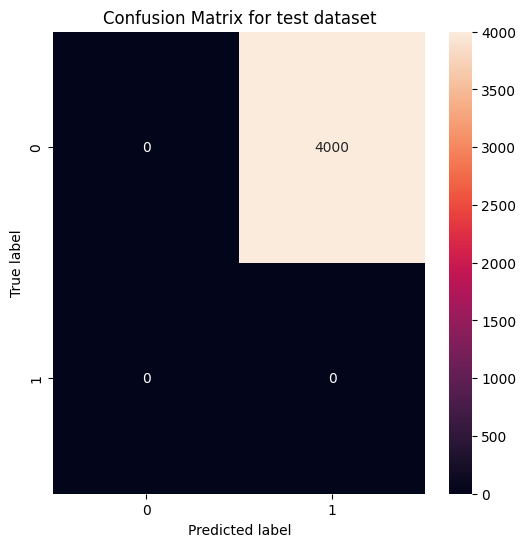

In [63]:
# Generate confusion matrix
cm = confusion_matrix(test_y, y_pred)
cm

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix for test dataset')
plt.show()

# Testing with SVM model task 2

In [69]:
import joblib

# Load the saved SVM model
svm_model = joblib.load('svm_model_Baby_Detection.pkl')

# Load the saved scaler
scaler = joblib.load('svm_scaler_Baby_Detection.pkl')

# Example: Preprocess test data and predict
X_test_scaled = scaler.transform(test_x_dataset_1_reduced)
y_pred = svm_model.predict(X_test_scaled)
y_pred




C:\Users\ANUSHRUTH\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([1., 1., 1., ..., 1., 1., 1.], shape=(4000,))

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: More detailed report
print("\nClassification Report:")
print(classification_report(test_y, y_pred))

# Optional: Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, y_pred))


Accuracy: 0.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00    4000.0
         1.0       0.00      0.00      0.00       0.0

    accuracy                           0.00    4000.0
   macro avg       0.00      0.00      0.00    4000.0
weighted avg       0.00      0.00      0.00    4000.0


Confusion Matrix:
[[   0 4000]
 [   0    0]]


C:\Users\ANUSHRUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANUSHRUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANUSHRUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANUSHRUTH\anaconda3\Lib\sit

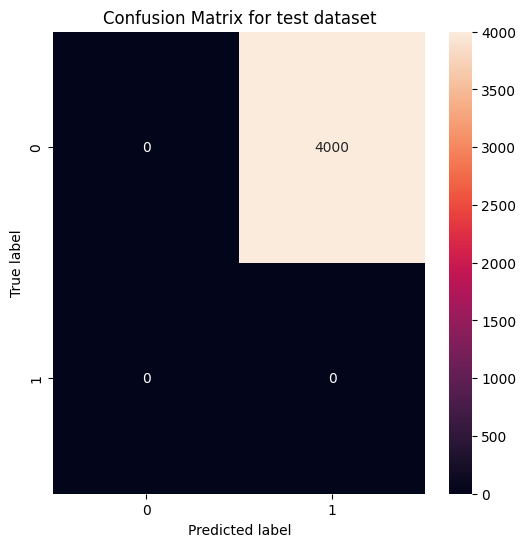

In [71]:
# Generate confusion matrix
cm = confusion_matrix(test_y, y_pred)
cm

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix for test dataset')
plt.show()